In [50]:
import numpy as np
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import japanize_matplotlib

In [51]:
class Perceptron(object):

  """
  パラメータ
  ---------
  eta : float（学習率：0.0 < eta >= 1.0）
  n_iter : int（訓練データの訓練回数）
  random_state : int（重みを初期化するための乱数シード）

  属性
  ---------
  w_ : １次元配列（適合後の重み）
  errors_ : リスト（各エポックでの誤分類の数）
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

    #訓練データに適合させる関数
  def fit(self, X, y):

    """
    パラメータ
    ---------
    X : {配列のようなデータ構造}, shape = [n_examples, n_features], （訓練データ）
        n_examplesは「訓練データの個数」, n_featuresは「特徴量の個数」
    
    y : 配列のようなデータ構造, shape = [n_example], （目的変数）

    戻り値
    ---------
    self : object
    """

    rgen = np.random.RandomState(self.random_state) #Numpyの乱数生成器
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter): #訓練回数分まで訓練データを反復
      errors = 0
      for xi, target in zip(X, y): #各訓練データで重みを更新
        update = self.eta * (target - self.predict(xi))
        # 重み(w1, ... , wm)の更新
        self.w_[1:] += update * xi
        # 重み(w0)の更新
        self.w_[0] += update
        # 重みの更新が0でない場合は誤分類としてカウント
        errors += int(update != 0.0)
      
      #反復ごとの誤差を格納
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    #総入力を計算
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    #１ステップ後のクラスラベルを返す
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [52]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [53]:
"""オンラインで作業する場合
s = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
print("URL : ", s)

df = pd.read_csv(s, header=None, encoding="utf-8")
display(df.tail())
"""

#localで作業する場合
df = pd.read_csv('c:\\Users\\admin\\Documents\\book\\python-machine-learning-book-3rd-edition\\src\\iris.data', header=None)
display(df.head())

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
pwd

'c:\\Users\\admin\\Documents\\book\\python-machine-learning-book-3rd-edition\\src'

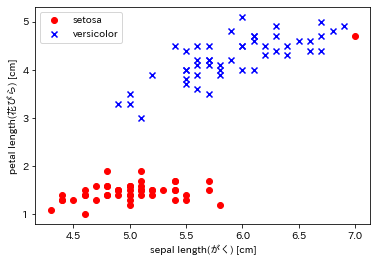

In [55]:
#1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
#Iris-setosaを-1, Iris-versicolorを1に変換
y = np.where(y == "Iris-setosa", -1, 1)

#1-100行目の1, 3列目の抽出
X = df.iloc[1:100, [0, 2]].values

#品種のsetosaのプロット（赤の◯）
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
#品種versicolorのプロット（青の✕）
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length(がく) [cm]")
plt.ylabel("petal length(花びら) [cm]")
#凡例の表示
plt.legend(loc="upper left")
plt.show()

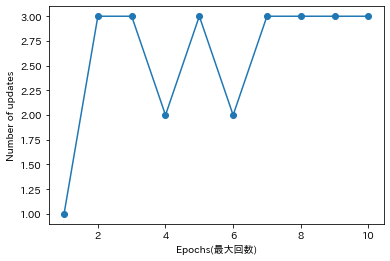

In [56]:
#パーセプトロンのインスタンス化（変数化）
ppn = Perceptron(eta=0.1, n_iter=10)
#訓練データへのモデルの適合
ppn.fit(X, y)
#エポック(最大回数)と誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs(最大回数)")
plt.ylabel("Number of updates")
plt.show()